In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
pokemon_original=pd.read_csv('pokemon.csv')
pokemon_original.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [23]:
pokemon_status=pokemon_original.drop(['#','Total','Generation','Legendary'],axis=1)
pokemon_status.head()


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


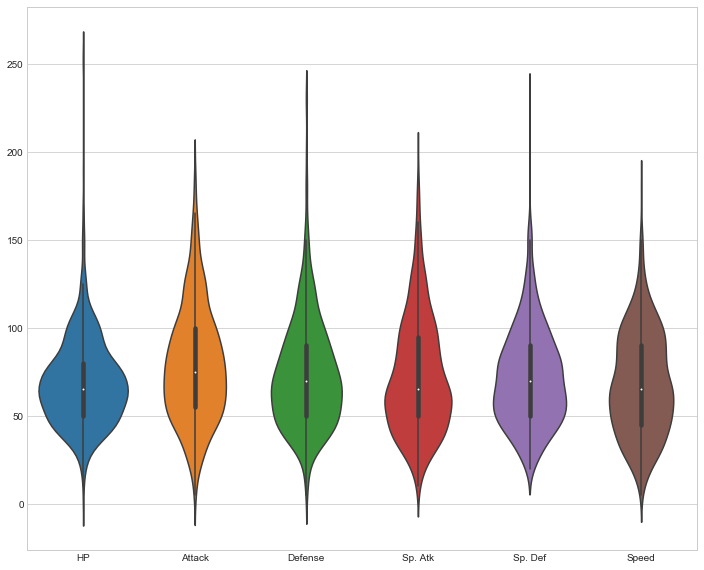

In [250]:
plt.figure(figsize=(12,10))
sns.violinplot(data=pokemon_status)

#status of all pokemon

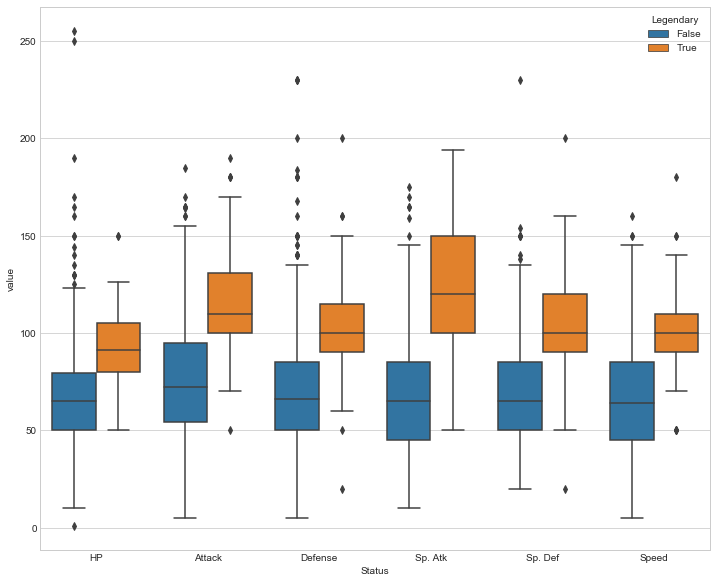

In [249]:
# Why legendary pokemon is legendary?

pokemon1=pokemon_original.drop(['Name','Type 1','Type 2','#','Total','Generation'],axis=1)
pokemon1=pd.melt(pokemon1,id_vars=['Legendary'],var_name='Status')
plt.figure(figsize=(12,10))
sns.boxplot(x='Status',y='value',hue='Legendary',data=pokemon1)


Text(0,0.5,'Count')

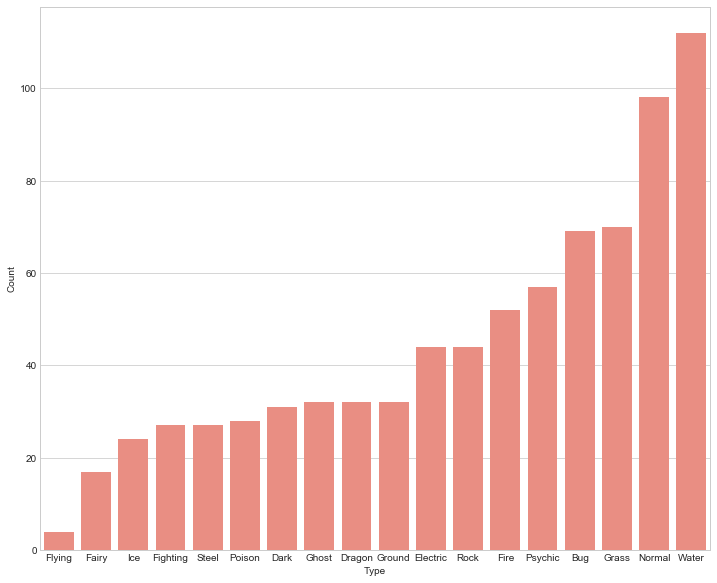

In [251]:
#pokemon count by type
pokemon4=pd.DataFrame(pokemon_original.groupby('Type 1')['Name'].count()).reset_index().sort_values('Name')
plt.figure(figsize=(12,10))
plot4=sns.barplot(x='Type 1',y='Name',data=pokemon4,color='salmon')
plot4.set_xlabel('Type')
plot4.set_ylabel('Count')


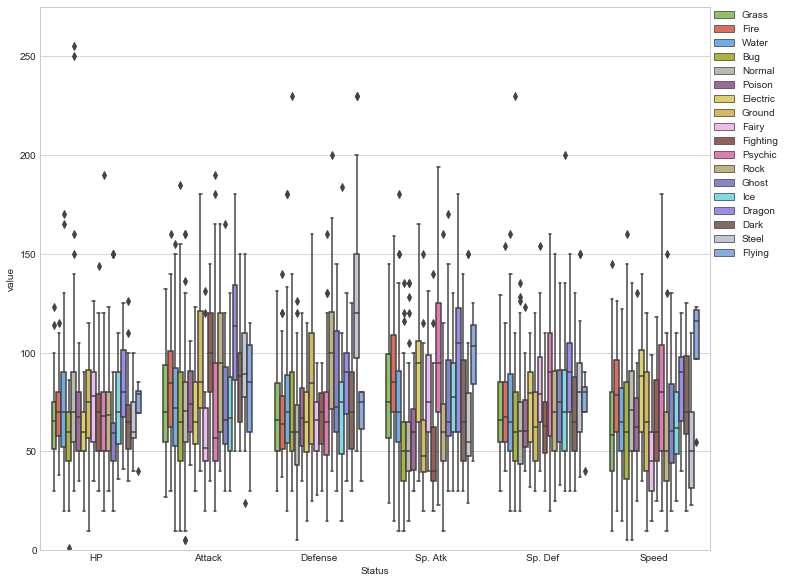

In [214]:
# status by type
pokemon2=pokemon_original.drop(['Total','Generation','Legendary','#'],axis=1)
pokemon2 = pd.melt(pokemon2, id_vars=['Name','Type 1','Type 2'], var_name='Status')
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    plot2=sns.boxplot(x='Status',y='value',data=pokemon2,hue='Type 1',dodge=True)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


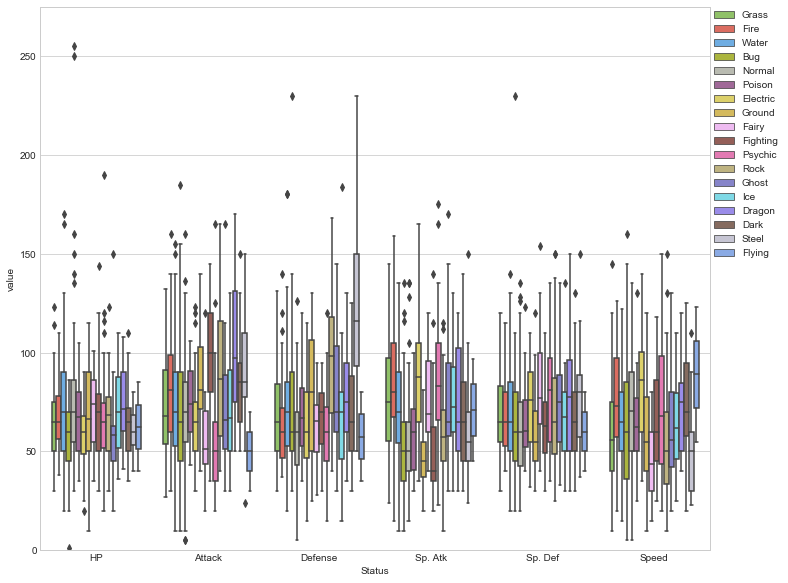

In [186]:
# Status by type, normal
Normal=pokemon_original[pokemon_original['Legendary']==False]
Normal=Normal.drop(['Legendary','#','Total','Generation'],axis=1)
Normal = pd.melt(Normal, id_vars=['Name','Type 1','Type 2'], var_name='Status')
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    plot_normal=sns.boxplot(x='Status',y='value',data=Normal,hue='Type 1',dodge=True)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


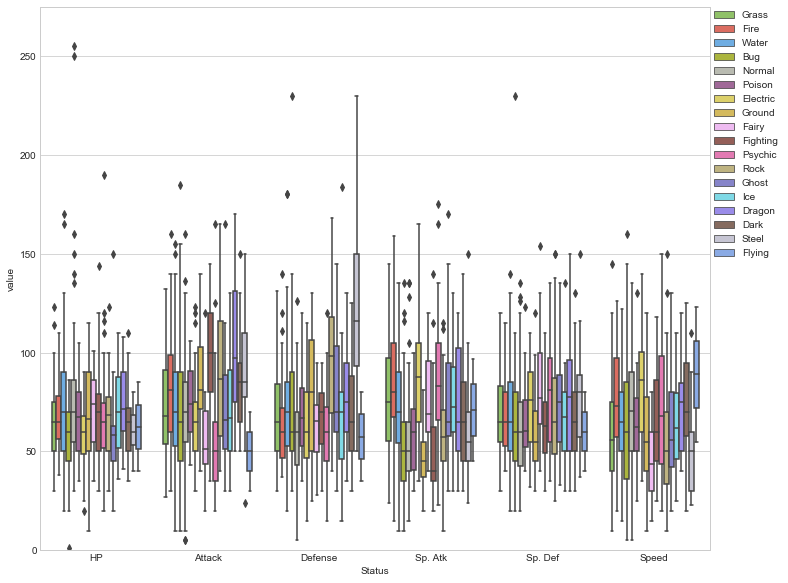

In [177]:
# Status by type, legendary
Legendary=pokemon_original[pokemon_original['Legendary']==True]
Legendary=Legendary.drop(['Legendary','#','Total','Generation'],axis=1)
Legendary = pd.melt(Legendary, id_vars=['Name','Type 1','Type 2'], var_name='Status')
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    plot_normal=sns.boxplot(x='Status',y='value',data=Normal,hue='Type 1')
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)


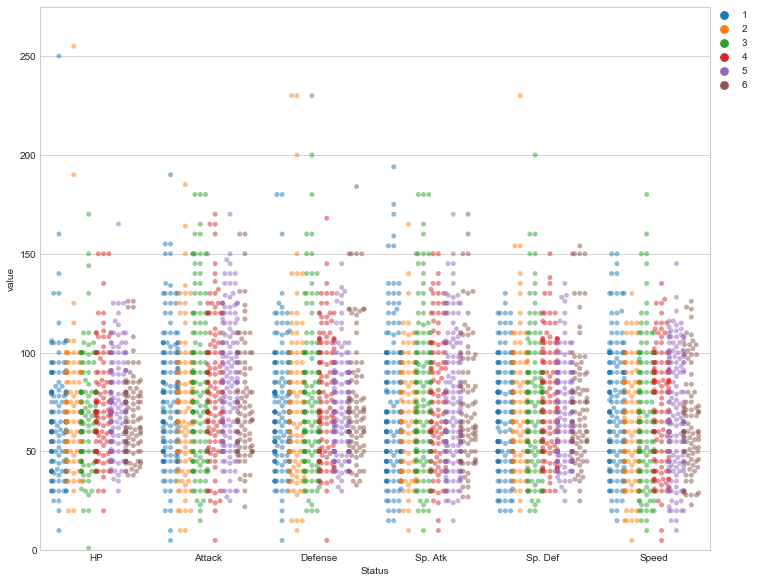

In [255]:
#Compare the six generations
pokemon3=pokemon_original.drop(['Total','Legendary','#','Type 1','Type 2'],axis=1)
pokemon3 = pd.melt(pokemon3, id_vars=['Generation','Name'], var_name='Status')
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
plt.ylim(0, 275)
plot3=sns.swarmplot(x='Status',y='value',data=pokemon3,hue='Generation',dodge=True)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


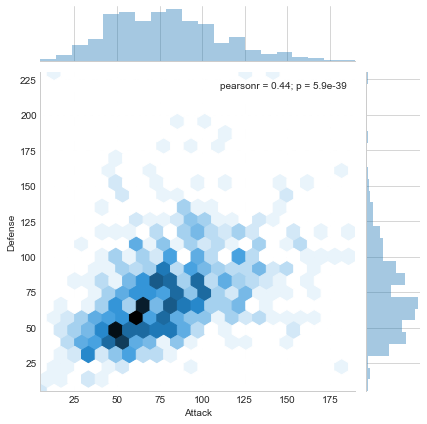

In [273]:
sns.jointplot(x='Attack', y='Defense', data=pokemon_status,kind='hex')

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


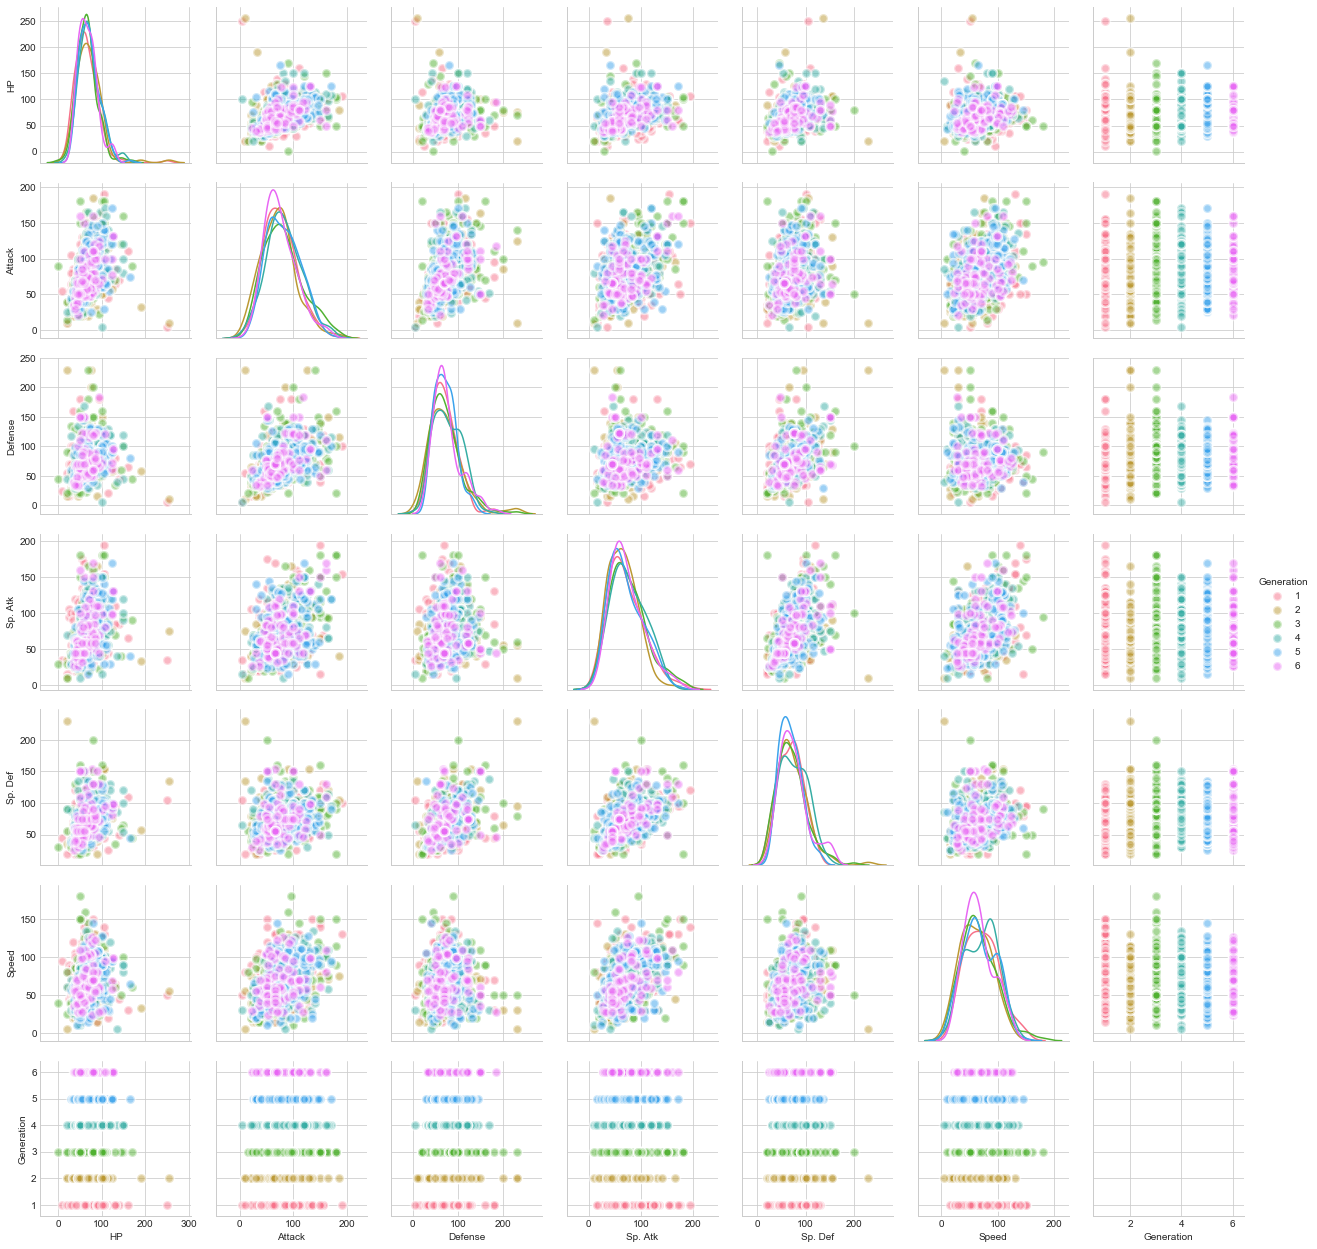

In [282]:
pokemon5=pokemon_original.drop(['#','Name','Type 1','Type 2','Total','Legendary'],axis=1)
sns.pairplot(pokemon5,hue='Generation',palette='husl',diag_kind='kde',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.5))